# Normal implementation of Machine Learning Techniques

This notebook consists of classifying MBTI types using 


1.   Multinominal Naive Bayes
2.   Gaussian Naive Bayes
3.   Complement Naive Bayes
4.   Categorical Naive Bayes
5.   K Means Clustring




All training examples were used regardless of proportion of class sizes. 



In [37]:
import pandas as pd

from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import LabelEncoder

import nltk
from sklearn.naive_bayes import MultinomialNB
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.metrics import accuracy_score as acs
import warnings

from nltk.corpus import stopwords
import re
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC,LinearSVC

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.ensemble import HistGradientBoostingClassifier



In [38]:
!git clone https://github.com/placid-brain/CDS-Project-2021.git

fatal: destination path 'CDS-Project-2021' already exists and is not an empty directory.


In [39]:
df = pd.read_csv("/content/CDS-Project-2021/personality_dataset/mbti_basic_cleaned_dataset.csv")
df.head()

,type,posts
0,INFJ,enfp intj moments sportscenter top ten plays p...
1,ENTP,finding lack posts alarming sex boring positio...
2,INTP,good one course say know blessing curse absolu...
3,INTJ,dear intp enjoyed conversation day esoteric ga...
4,ENTJ,fired another silly misconception approaching ...


In [40]:
df["type"].value_counts()

INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: type, dtype: int64

In [41]:
train_df, test_df = train_test_split(df,test_size=0.3,random_state=42,stratify=df.type )

In [42]:


train_df_index_list=list(train_df.index)

test_df_index_list=list(test_df.index)


In [43]:
from sklearn.feature_extraction.text import CountVectorizer



vectorizer = CountVectorizer(max_features=500)
  
vectorizer.fit(train_df['posts'].astype('U'))
#vectorizer.fit(test_df['posts'].astype('U'))

#train_df.posts.values.astype('U')
#test_df.posts.values.astype('U')

train_df_vector = vectorizer.transform(train_df.posts.astype('U')).toarray()

test_df_vector = vectorizer.transform(test_df.posts.astype('U')).toarray()

print(train_df_vector.shape)
print(test_df_vector.shape)

(6072, 500)
(2603, 500)


In [44]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()


train_df_target = le.fit_transform(train_df.type)
test_df_target = le.fit_transform(test_df.type)

print(train_df_target.shape)
print(test_df_target.shape)

(6072,)
(2603,)


In [45]:
# dictionary to store model accuracy
accuracy_record={}

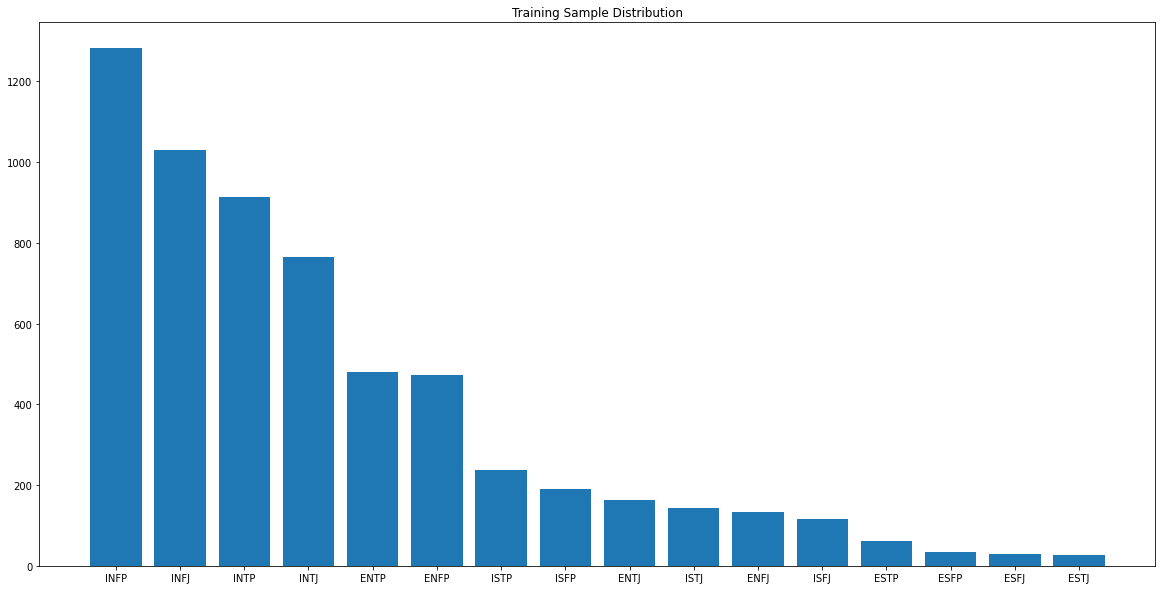

In [46]:

# Constructing training examples graph

import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(figsize=(20,10))



train_label_df=pd.DataFrame(train_df['type'].value_counts())



plt.bar(train_label_df.index, train_label_df['type'])
plt.title("Training Sample Distribution")
plt.show()

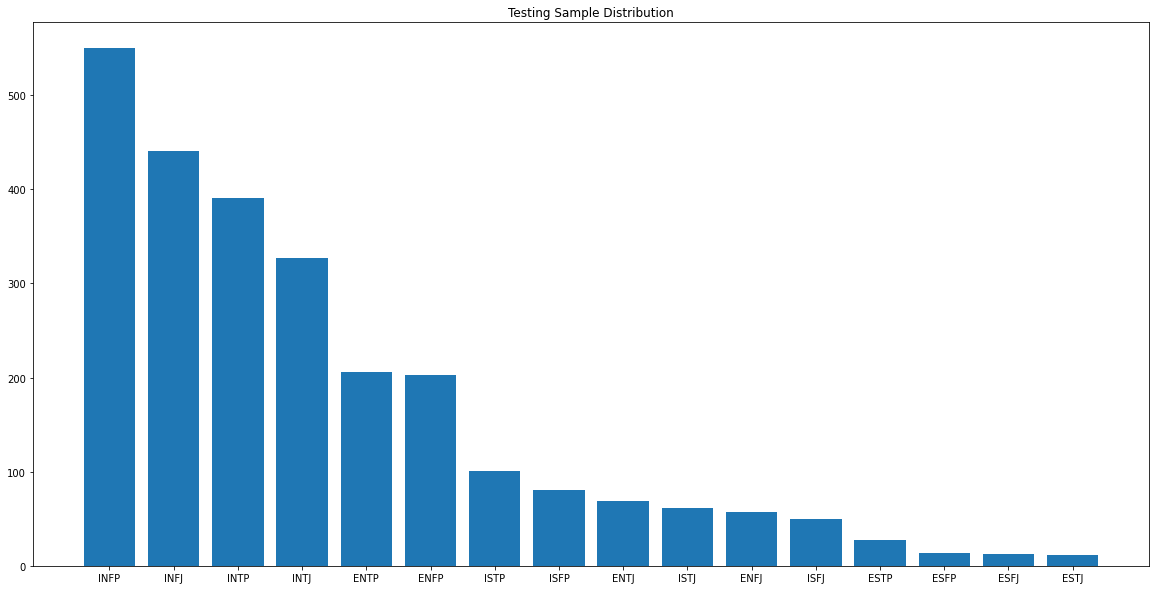

In [47]:
# Constructing testing examples graph



f, ax = plt.subplots(figsize=(20,10))



test_label_df=pd.DataFrame(test_df['type'].value_counts())



plt.bar(test_label_df.index, test_label_df['type'])
plt.title("Testing Sample Distribution")
plt.show()

## Gaussian Naive Bayes



1.   Training Sample 
2.   Testing Sample
3.   Recording accuracy of Gaussian Naive Bayes in accuracy record



In [48]:
# 1

from sklearn.naive_bayes import GaussianNB


gnb = GaussianNB()

# training the sample
gnb.fit(train_df_vector,train_df_target)

GaussianNB()

In [49]:
#2

#testing the sample

target_pred = gnb.predict(test_df_vector)


In [50]:
# 3
from sklearn.metrics import accuracy_score as acs

acs = acs(test_df_target,target_pred)
accuracy_record["Gaussian Naive Bayes"] = acs
print("\n")
print("\n")
print("The accuracy is: "+str(acs))
print("\n")
print("\n")





The accuracy is: 0.37879369957741066






## Multinomial Naive Bayes



1.   Training Sample 
2.   Testing Sample
3.   Recording accuracy of Multinomial Naive Bayes in accuracy record



In [51]:
# 1

from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()

# training the sample
mnb.fit(train_df_vector,train_df_target)


MultinomialNB()

In [52]:
#2

#testing the sample

target_pred = mnb.predict(test_df_vector)


In [53]:
# 3
from sklearn.metrics import accuracy_score as acs

acs = acs(test_df_target,target_pred)
accuracy_record["Multinomial Naive Bayes"] = acs
print("\n")
print("\n")
print("The accuracy is: "+str(acs))
print("\n")
print("\n")





The accuracy is: 0.5843257779485209






## Complement Naive Bayes



1.   Training Sample 
2.   Testing Sample
3.   Recording accuracy of Complement Naive Bayes in accuracy record



In [54]:
# 1
from sklearn.naive_bayes import ComplementNB

cnb = ComplementNB()

# training the sample
cnb.fit(train_df_vector,train_df_target)

ComplementNB()

In [55]:
#2

#testing the sample

target_pred = cnb.predict(test_df_vector)


In [56]:
# 3
from sklearn.metrics import accuracy_score as acs

acs = acs(test_df_target,target_pred)
accuracy_record["Complement Naive Bayes"] = acs
print("\n")
print("\n")
print("The accuracy is: "+str(acs))
print("\n")
print("\n")





The accuracy is: 0.6319631194775259






## Categorical Naive Bayes



1.   Training Sample 
2.   Testing Sample
3.   Recording accuracy of Categorical Naive Bayes in accuracy record



In [57]:
# 1
from sklearn.naive_bayes import CategoricalNB

catnb = CategoricalNB()

# training the sample
catnb.fit(train_df_vector,train_df_target)

CategoricalNB()

In [58]:
#2

#testing the sample

target_pred = cnb.predict(test_df_vector)


In [59]:
# 3
from sklearn.metrics import accuracy_score as acs

acs = acs(test_df_target,target_pred)
accuracy_record["Categorical Naive Bayes"] = acs
print("\n")
print("\n")
print("The accuracy is: "+str(acs))
print("\n")
print("\n")





The accuracy is: 0.6319631194775259






## Accuracy values

In [60]:
print(accuracy_record)

{'Gaussian Naive Bayes': 0.37879369957741066, 'Multinomial Naive Bayes': 0.5843257779485209, 'Complement Naive Bayes': 0.6319631194775259, 'Categorical Naive Bayes': 0.6319631194775259}


## K-Means Clustering

Both train_df_vector and test_df_vector will be passed through unlabelled. Afterwards using the Elbow method, an optimal number of clusters will be calculated to group the data examples.



In [61]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1,17):
  k_means = KMeans(n_clusters=i, init ='k-means++', max_iter=100,  n_init=10,random_state=0 )

  k_means.fit(train_df_vector)

  wcss.append(k_means.inertia_)

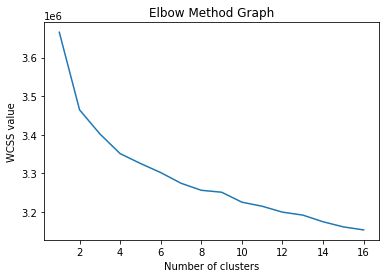

In [62]:
plt.plot(range(1,17),wcss)
plt.title("Elbow Method Graph")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS value")
plt.show()


The elbow method lets us find out the optimal number of clusters by identifying the point at which the graph started to decrease linearly. In this case, the k value is likely to be 4.

In [63]:
k_means = KMeans(n_clusters = 4,init ='k-means++', max_iter=100,  n_init=10,random_state=0)

y_kmeans = k_means.fit_predict(test_df_vector)

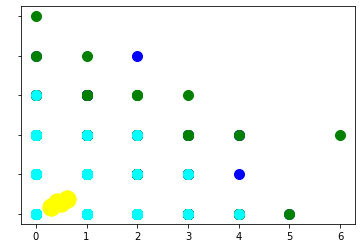

In [64]:
plt.scatter(test_df_vector[y_kmeans==0, 0], test_df_vector[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(test_df_vector[y_kmeans==1, 0], test_df_vector[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(test_df_vector[y_kmeans==2, 0], test_df_vector[y_kmeans==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(test_df_vector[y_kmeans==3, 0], test_df_vector[y_kmeans==3, 1], s=100, c='cyan', label ='Cluster 4')

plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
#plt.xticks(color='w')
plt.yticks(color='w')
plt.show()
